In [75]:
import math
from scipy import integrate
import numpy as np
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [76]:
bodies = 3
N = bodies * 4
# position = [random.randint(-100,100) for _ in range(N)]
# velocity = [random.randint(-,100) for _ in range(N)]

#motion = [random.randint(-100,100) for _ in range(N)]

prob = np.zeros(3)

G = 1
au = 1
mass = [10 ,15,20] 
r = np.zeros(3)
velo = np.zeros(3)
shift=[-1,0,1]

# G = 6.674e-11
# Msun = 1.989e+30
# mass = [15 * Msun,15 * Msun,15 * Msun] 
# au = 1.495e+11
# velo = 30000

In [77]:
def derivative(motion):

    d_motion = np.zeros(bodies*4)
    
    for i in range(bodies):
        I = i * 4
        d_motion[I+0] = motion[I + 2]
        d_motion[I+1] = motion[I + 3]
        d_motion[I+2] = acceleration(motion,i,0)
        d_motion[I+3] = acceleration(motion,i,1)
        # d_motion[I+2] = 0
        # d_motion[I+3] = 0
    
    return d_motion



def acceleration(motion, i, coordinate):
    
    result = 0
    I = i * 4 
    for j in range(bodies):
        if(i == j):
             continue
        J = j * 4 
        totalDist=r[j+shift[i]]
        result += -G * mass[j] * (motion[I + coordinate] - motion[J + coordinate]) / pow(totalDist,3)
    
    return result
    

def R(x1,y1,x2,y2):
    deltaX = x1-x2
    deltaY = y1-y2
    r = math.sqrt(pow(deltaX,2) + pow(deltaY,2))
    return r

def V(v1,v2):
    velocity = math.sqrt(pow(v1,2)+pow(v2,2))
    return velocity

def calculateEnergy():
  E=0
  for i in range(bodies):
    for j in range(bodies):
      if(j<=i):
        continue
      E += -(G*mass[i]*mass[j])/r[j+shift[i]]
    
    E += (mass[i]* pow(velo[i],2))/2
  return E


In [78]:
# parameters
delta_t = 0.001
steps = 20000000
dots = []

motion= [1,0,0,0.7,-1,0,0.,-0.7,200,0,1,1]
print("initial", motion)

dots.append(motion[0])
dots.append(motion[1])
dots.append(motion[4])
dots.append(motion[5])
dots.append(motion[8])
dots.append(motion[9])

for t in range(steps-1):
  
  r[0] = R(motion[0],motion[1],motion[4],motion[5])
  r[1] = R(motion[0],motion[1],motion[8],motion[9])
  r[2] = R(motion[4],motion[5],motion[8],motion[9])
  velo[0] = V(motion[2],motion[3])
  velo[1] = V(motion[6],motion[7])
  velo[2] = V(motion[10],motion[11])

  if(t==0):
    E= calculateEnergy()
    print(E)
  
  d_motion = derivative(motion)

  if (E>=0):
    break

  for k in range(bodies):
    K = k * 4
    motion[K] = motion[K] + d_motion[K]*delta_t
    motion[K + 1] = motion[K + 1] + d_motion[K + 1] * delta_t
    motion[K + 2] = d_motion[K] + d_motion[K + 2] * delta_t
    motion[K + 3] = d_motion[K + 1] + d_motion[K + 3] * delta_t

    dots.append(motion[K])
    dots.append(motion[K+1])

  # # bound
  # if(E < 0):
  #   s=2
  # # unbounded
  # else:
  #   s=3    
print("  final ", motion)
print(E)
print(t)

  # #     
  # RR = [r02+r01,r01+r12,r02+r12]
  # g=max(RR)
  # for o in range(3):
  #       if(RR[o] == g):
  #           prob[o]+=1
  #           break

initial [1, 0, 0, 0.7, -1, 0, 0.0, -0.7, 200, 0, 1, 1]
-51.37256243906097
  final  [27651.782149228096, -9451.505274539226, 1.3814713287954743, -0.4700082250284939, -16661.32292634744, 2940.69336099195, -0.8313487701152009, 0.14722341980168416, 18869.850120148683, 19020.231791527898, 0.9327759131888074, 0.9495865476630853]
-51.37256243906097
19999998


In [79]:
# x1 = list()
# x2 = list()
# x3 = list()
# y1 = list()
# y2 = list()
# y3 = list()
# for i in range(0,len(dots),6):
#   x1.append(dots[i])
#   y1.append(dots[i+1])
#   x2.append(dots[i+2])
#   y2.append(dots[i+3])
#   x3.append(dots[i+4])
#   y3.append(dots[i+5])


# def my_func(i):
#   plt.plot(x1, y1, label = "mass 1")
#   plt.plot(x2, y2, label = "mass 2")
#   plt.plot(x3, y3, label = "mass 3")
#   plt.legend()

#   #     if(k==0):
#   #       ax1.plot(motion[K],motion[K+1], color='green')
#   #       # plt.scatter(motion[K],motion[K+1])
#   #       # plt.pause(0.05)



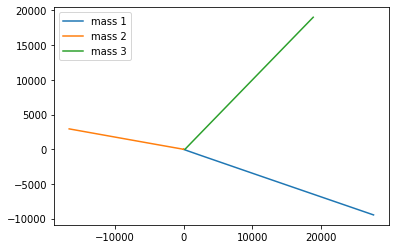

In [80]:
x1 = list()
x2 = list()
x3 = list()
y1 = list()
y2 = list()
y3 = list()
for i in range(0,len(dots),6):
  x1.append(dots[i])
  y1.append(dots[i+1])
  x2.append(dots[i+2])
  y2.append(dots[i+3])
  x3.append(dots[i+4])
  y3.append(dots[i+5])

plt.plot(x1, y1, label = "mass 1")
plt.plot(x2, y2, label = "mass 2")
plt.plot(x3, y3, label = "mass 3")
plt.legend()
plt.show()



  


In [81]:
# # fig = plt.figure()
# # ax1 = fig.add_subplot(122)
# ani = FuncAnimation(fig, my_func, frames=20, interval=500, repeat=False)
# plt.show()


In [82]:
prob/(t+1)

array([0., 0., 0.])